In [66]:
import os
import numpy as np
import matplotlib.pyplot as plt
import py_tps as tps
from PIL import Image

In [67]:
# Путь к папке с изображениями и файлу *.TPS
image_dir = '../data/raw/Ac_Fom_2022_WM'      # <- задать
# Имя файла *.TPS
tps_file_name = 'Ac_Fom2022WM_FL.TPS'         # <- задать

In [68]:
# Путь к файлу *.TPS (проверить, что путь правильный)
tps_file_path = os.path.join(image_dir, tps_file_name)
print(tps_file_path)

../data/raw/Ac_Fom_2022_WM\Ac_Fom2022WM_FL.TPS


In [69]:
# Загрузка всех данных из *.TPS файла в переменную `tps_file`
tps_file = tps.TPSFile.read_file(tps_file_path)

In [70]:
# Колличество записей в *.TPS файле бужет храниться в переменной `number_tps_file`
number_tps_file = len(tps_file.images)
print(number_tps_file)

281


In [71]:
# Проверка, что все файлы изображений записанные в *.TPS есть в папке `image_dir`
for i in range(number_tps_file):
    if not(os.path.exists(os.path.join(image_dir, tps_file.images[i].image))):
        print(f"В папке {image_dir} нет файла {tps_file.images[i].image}")
else:
    print(f"В папке {image_dir} найдены все файлы из {tps_file_name}")

В папке ../data/raw/Ac_Fom_2022_WM найдены все файлы из Ac_Fom2022WM_FL.TPS


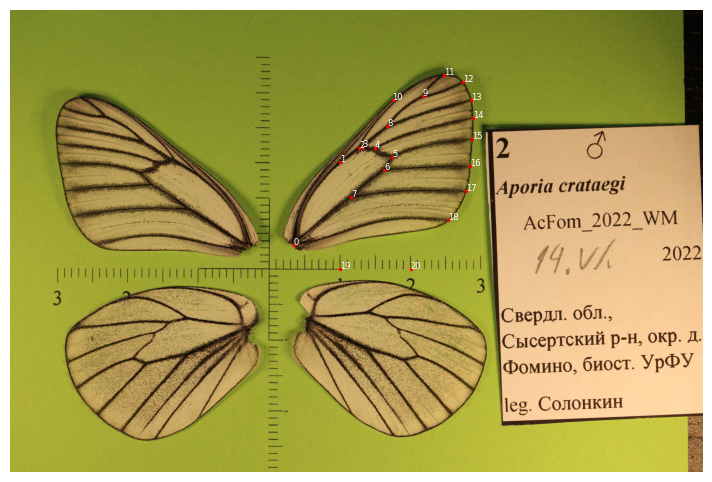

Размер фотографии 5184 на 3456 px.
Число ландмарков 21


In [76]:
# Вывод всех изображений с наложенными ландмарками для проверки
index = 1                # <- номер выводимой фотографии от 0 и до числа в переменной `number_tps_file`

image = Image.open(os.path.join(image_dir, tps_file.images[index].image))
image_array = np.array(image)
image_shape = image_array.shape
landmarks = tps_file.images[index].landmarks.points
landmarks_flip = np.zeros(landmarks.shape)
landmarks_flip[:,0] = landmarks[:,0]
landmarks_flip[:,1] = image_shape[0] - landmarks[:,1]

landmarks_markers = np.arange(landmarks.shape[0])

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_array)
ax.axis(False)
ax.scatter(landmarks_flip[:,0], landmarks_flip[:,1], s=2, color ='r') # <- тут можно поменять размер (s) и цвет (color) ландмарок
for i, txt in enumerate(landmarks_markers):
    ax.annotate(txt, (landmarks_flip[i,0], landmarks_flip[i,1]), fontsize = 6, color = 'w') # <- тут можно поменять размер (fontsize) и цвет (color) подписей ландмарок
plt.show()

print(f"Размер фотографии {image_shape[1]} на {image_shape[0]} px.")
print(f"Число ландмарков {landmarks.shape[0]}")


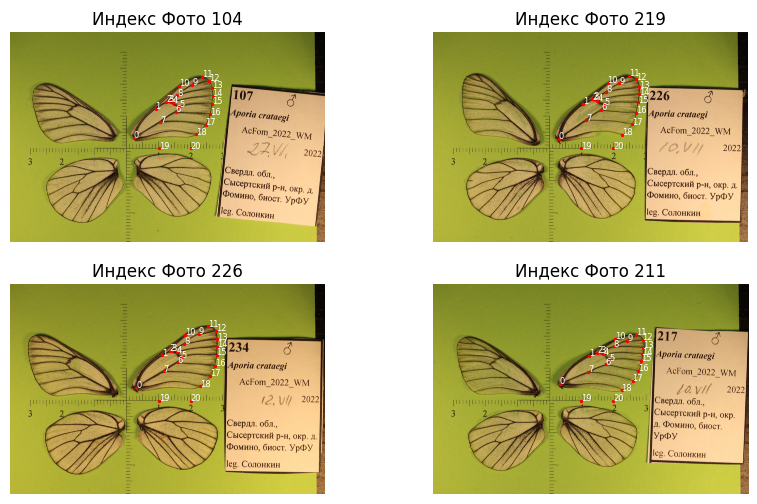

In [78]:
# Вывод рандомных 4-х картинок для проверки

indexs = np.random.randint(0, number_tps_file, 4)

fig, axs = plt.subplots(2,2, figsize=(10, 6))
for ax, index in zip(axs.flat, indexs):
    image = Image.open(os.path.join(image_dir, tps_file.images[index].image))
    image_array = np.array(image)
    image_shape = image_array.shape
    landmarks = tps_file.images[index].landmarks.points
    landmarks_flip = np.zeros(landmarks.shape)
    landmarks_flip[:,0] = landmarks[:,0]
    landmarks_flip[:,1] = image_shape[0] - landmarks[:,1]

    landmarks_markers = np.arange(landmarks.shape[0])
    
    ax.imshow(image_array)
    ax.set_title(f"Индекс Фото {index}")
    ax.axis(False)
    ax.scatter(landmarks_flip[:,0], landmarks_flip[:,1], s=2, color ='r') # <- тут можно поменять размер (s) и цвет (color) ландмарок
    for i, txt in enumerate(landmarks_markers):
        ax.annotate(txt, (landmarks_flip[i,0], landmarks_flip[i,1]), fontsize = 6, color = 'w') # <- тут можно поменять размер (fontsize) и цвет (color) подписей ландмарок
plt.show()